In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
sku_with_cluster = pd.read_csv('sku_with_cluster.csv')
sku_with_cluster.head()

,"('quantity', 'mean')","('quantity', 'sum')","('order_ID', 'nunique')","('order_hour', 'nunique')","('order_hour', 'group_mode')","('day_of_month', 'nunique')","('day_of_month', 'group_mode')","('original_unit_price', 'mean')","('discount_rate', 'mean')","('direct_discount_rate', 'mean')",...,"('dc_ori', 'group_mode')","('dc_des', 'nunique')","('dc_des', 'group_mode')","('promise', 'group_mode')","('type', 'group_mode')",brand_ID,attribute1,attribute2,cluster_id,sku_ID
0,0.016613,-0.104401,-0.104149,0.938484,"(20.0, 22.0]",0.447133,11,-0.187985,-0.670775,-0.573686,...,2,0.026780,4,-,2,9d3465eacc,4.0,100.0,0,000aa92b82
1,-0.085135,-0.127381,-0.128484,-0.900601,"(8.0, 10.0]",-0.678702,12,0.051392,1.216695,2.359627,...,9,-0.585264,9,-,2,42e6445fca,4.0,100.0,4,000d4af39d
2,-0.085135,-0.127381,-0.128484,-0.900601,"(13.0, 15.0]",-0.678702,12,-0.084642,0.066594,0.617621,...,5,-0.585264,5,-,2,4f65703579,3.0,100.0,11,000dc27e13
3,-0.085135,-0.127381,-0.128484,-0.900601,"(0.0, 8.0]",-0.678702,19,-0.214348,-0.719927,-0.573686,...,9,-0.585264,9,-,2,137b63c785,3.0,100.0,11,000e84e3a7
4,-0.041003,0.028178,0.052921,1.858027,"(18.0, 20.0]",2.448617,14,-0.201694,0.268572,0.884032,...,5,2.092427,4,2,2,5a0b271e15,2.0,100.0,6,00104dbcd7


In [3]:
sku_with_cluster['cluster_id'].value_counts()

11    4521
0     1403
4     1231
6      615
7      429
3      429
10     404
2       97
5       11
8       10
1        7
9        2
Name: cluster_id, dtype: int64

<AxesSubplot:title={'center':'cluster distribution'}, xlabel='cluster ID', ylabel='number of skus'>

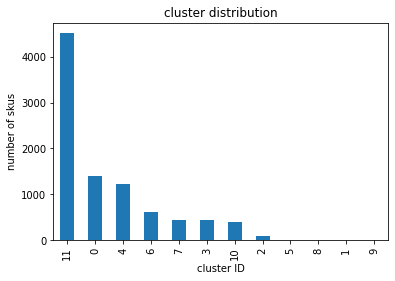

In [4]:
sku_with_cluster['cluster_id'].value_counts().plot(kind = 'bar', xlabel = 'cluster ID', ylabel = 'number of skus', title = 'cluster distribution')

In [4]:
order_new['dc_des'].unique()

array([28, 16, 33,  3, 64, 42,  6,  7, 43, 20, 30, 50, 25, 32, 49,  2,  8,
       62, 34, 39,  1, 41, 27,  9, 60, 26, 40, 36, 61, 46, 55, 22,  4, 51,
       10, 11, 44, 19, 45, 24, 52, 21, 29, 17, 15, 47, 48, 54, 31,  5, 12,
       35, 37, 13, 67, 53, 14, 23, 38, 18])

In [5]:
order_new['dc_des'].nunique()

60

In [2]:
order_new = pd.read_csv('order_after_engineer.csv')
order_new.head()

,sku_ID,order_ID,quantity,type,promise,original_unit_price,discount_rate,direct_discount_rate,quantity_discount_rate,bundle_discount_rate,gift_item,dc_ori,dc_des,day_of_month,day_of_week,order_hour
0,581d5b54c1,d0cf5cc6db,1,2,-,89.0,0.112360,0.00000,0.11236,0.0,0,4,28,1,3,17
1,067b673f2b,7444318d01,1,1,2,99.9,0.460460,0.05005,0.41041,0.0,0,28,28,1,3,11
2,623d0a582a,f973b01694,1,1,2,78.0,0.250000,0.25000,0.00000,0.0,0,28,28,1,3,9
3,fc5289b139,8c1cec8d4b,1,1,2,61.0,0.426230,0.00000,0.42623,0.0,0,4,28,1,3,21
4,623d0a582a,d43a33c38a,1,1,1,78.0,0.320513,0.24359,0.00000,0.0,0,3,16,1,3,19


In [6]:
order_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549989 entries, 0 to 549988
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   sku_ID                  549989 non-null  object 
 1   order_ID                549989 non-null  object 
 2   quantity                549989 non-null  int64  
 3   type                    549989 non-null  int64  
 4   promise                 549989 non-null  object 
 5   original_unit_price     549989 non-null  float64
 6   discount_rate           549989 non-null  float64
 7   direct_discount_rate    549989 non-null  float64
 8   quantity_discount_rate  549989 non-null  float64
 9   bundle_discount_rate    549989 non-null  float64
 10  gift_item               549989 non-null  int64  
 11  dc_ori                  549989 non-null  int64  
 12  dc_des                  549989 non-null  int64  
 13  day_of_month            549989 non-null  int64  
 14  day_of_week         

In [7]:
# aggregate order table
order_with_cluster = pd.merge(order_new, sku_with_cluster[['sku_ID', 'cluster_id','attribute1','attribute2']], how = 'left', left_on = 'sku_ID', right_on = 'sku_ID')
des_list = list(set(order_with_cluster['dc_des']))

In [8]:
def group_mode(x):
    return x.value_counts().index[0]

def agg_order_each_destination(dc_des_i):
    des_i_orders = order_with_cluster[order_with_cluster['dc_des']==dc_des_i]
    order_for_des_i = des_i_orders.groupby(['day_of_month','cluster_id']).agg(
        demand = ('quantity','sum'),
        day_of_week = ('day_of_week', lambda x: x.iloc[0]),
        order_hour_mode = ('order_hour', group_mode),
        order_hour_08 = ('order_hour', lambda x: sum((x>0) & (x<= 8))/len(x)),
        order_hour_95 = ('order_hour', lambda x: sum((x>8) & (x<= 17))/len(x)),
        att1_high = ('attribute1', lambda x: sum((x =='3.0') | (x == '4.0'))/len(x)), # percentage of high attribute1
        att1_miss = ('attribute1', lambda x: sum(x =='-')/len(x)),
        att2_high = ('attribute2', lambda x: sum((x =='70.0') | (x == '80.0')| (x == '90.0')| (x == '100.0'))/len(x)),
        att2_miss = ('attribute2', lambda x: sum(x =='-')/len(x)),
        type_1_percent = ('type', lambda x: sum(x == 1)/len(x)),
        no_promise = ('promise', lambda x: sum(x =='-')/len(x)), # no promise's percentage
        fast_promise = ('promise', lambda x: sum((x =='1') | (x == '2')| (x == '3'))/len(x)), # deliver in 3-days
        original_unit_price_mean = ('original_unit_price', 'mean'),
        discount_rate_mean = ('discount_rate','mean'),  # average discount rate
        direct_discount_rate_mean = ('direct_discount_rate', 'mean'),
        quantity_discount_rate_mean = ('quantity_discount_rate','mean'),
        bundle_discount_mean = ('bundle_discount_rate','mean'),
        gift_mean = ('gift_item','mean'),
        dc_ori_mode = ('dc_ori',group_mode),
        dc_ori_num = ('dc_ori','nunique')
    )
    order_for_des_i['cluster_id'] = order_for_des_i.index.get_level_values('cluster_id')
    order_for_des_i.index = order_for_des_i.index.get_level_values('day_of_month')
    return order_for_des_i

In [9]:
order_dict = dict()
for des_num in des_list:
    order_dict[des_num] = agg_order_each_destination(des_num).reset_index().to_dict()
    #print('destination{} dataframe has shape {}x{}'.format(des_num,len(order_dict[des_num]),len(order_dict[des_num].iloc[0])))

In [10]:
#import json
#with open('order_dict.json','w') as f:
#    json.dump(order_dict, f)

In [11]:
order_dict = {k: pd.DataFrame(v) for k, v in order_dict.items()}
dfs_length = []
for des_num in des_list:
    dfs_length.append(len(order_dict[des_num]))

Text(0.5, 1.0, 'dataframes length distribution')

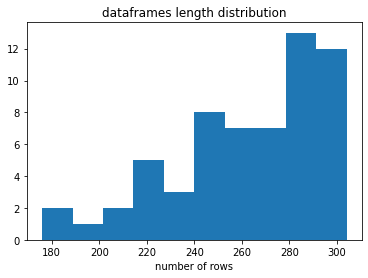

In [12]:
import matplotlib.pyplot as plt
plt.hist(dfs_length)
plt.xlabel('number of rows')
plt.title('dataframes length distribution')

In [13]:
df = order_dict[1].copy()
df = df.fillna(0)
df.replace(np.inf,0, inplace = True)

In [14]:
# convert data type for categorical features
df['cluster_id'] = df['cluster_id'].astype('object')
df['dc_ori_mode'] = df['dc_ori_mode'].astype('object')
df['day_of_week'] = df['day_of_week'].astype('object')
# order_hour_mode??

cat = ['cluster_id','dc_ori_mode','day_of_week']
num = df.drop(cat+['demand'], axis = 1).columns

In [15]:
corr = df[num].corr()
# find pairs that has absolute correlation greater than 0.5
c = corr.unstack()
c[(c<1) & (abs(c)>0.6)].drop_duplicates()

att1_miss                 att2_miss       0.797182
type_1_percent            no_promise     -0.833402
                          fast_promise    0.914567
                          dc_ori_num      0.722434
no_promise                fast_promise   -0.837449
                          dc_ori_num     -0.616265
fast_promise              dc_ori_num      0.685381
original_unit_price_mean  gift_mean      -0.669822
discount_rate_mean        gift_mean       0.794096
dtype: float64

In [16]:
# train test split
train = df.query('1<= day_of_month <= 24')
test = df.query('24 < day_of_month <= 31')

In [17]:
ols = smf.ols('demand ~'+ '+'.join(df.drop('demand', axis = 1).columns), data = train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     16.94
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           4.68e-39
Time:                        17:59:23   Log-Likelihood:                -665.57
No. Observations:                 198   AIC:                             1409.
Df Residuals:                     159   BIC:                             1537.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -10.5418      8.606     -1.225      0.222     -27.538       6.454
day_of_week[T.1]               -0.5047      2.323     -0.217      0.828      -5.093       4.083
day_of_week[T.2]                2.1119      2.321      0.910      0.364      -2.472       6.696
day_of_week[T.3]                5.7052      2.058      2.772      0.006       1.641       9.769
day_of_week[T.4]                2.0258      2.141      0.946      0.345      -2.203       6.254
day_of_week[T.5]                0.2812      2.248      0.125      0.901      -4.159       4.721
day_of_week[T.6]               -0.4028      2.473     -0.163      0.871      -5.286       4.480
dc_ori_mode[T.7]                6.6747      3.173      2.104      0.037       0.408      12.941
dc_ori_mode[T.56]              -0.8887      9.564     -0.093      0.926     -19.777      17.999
dc_ori_mode[T.58]              14.6286      9.532      1.535      0.127      -4.196      33.453
dc_ori_mode[T.59]               5.8462      7.228      0.809      0.420      -8.429      20.122
cluster_id[T.1]                 6.2418      6.384      0.978      0.330      -6.367      18.851
cluster_id[T.2]                 9.1195      4.782      1.907      0.058      -0.326      18.565
cluster_id[T.3]                -8.1508      5.927     -1.375      0.171     -19.857       3.555
cluster_id[T.4]                -9.4491      5.829     -1.621      0.107     -20.961       2.063
cluster_id[T.6]                15.3471      3.001      5.115      0.000       9.421      21.273
cluster_id[T.7]                15.6498      7.473      2.094      0.038       0.891      30.408
cluster_id[T.8]                10.7766      4.577      2.354      0.020       1.737      19.816
cluster_id[T.9]                86.2869      9.432      9.148      0.000      67.658     104.915
cluster_id[T.10]              -25.0189      5.884     -4.252      0.000     -36.640     -13.398
cluster_id[T.11]                1.2842      2.672      0.481      0.631      -3.993       6.561
day_of_month                   -0.2547      0.096     -2.661      0.009      -0.444      -0.066
order_hour_mode                -0.1222      0.186     -0.657      0.512      -0.490       0.245
order_hour_08                  -1.1981      5.504     -0.218      0.828     -12.069       9.673
order_hour_95                  -0.0247      2.928     -0.008      0.993      -5.807       5.758
att1_high                       4.4517      3.964      1.123      0.263      -3.378      12.281
att1_miss                       9.6748      4.981      1.942      0.054      -0.162      19.512
att2_high                       0.2259      3.199      0.071      0.944      -6.093       6.545
att2_miss                      -7.9567      4.528     -1.757      0.081     -16.900       0.987
type_1_perc